In [1]:
import tensorflow as tf

/root/miniconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/root/miniconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/root/miniconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/root/miniconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

In [2]:
# Install a temporary patch to enable a few extra TF 2.0 upgrades. This piece will be removed soon.

from tensorflow.python.ops import control_flow_util
control_flow_util.ENABLE_CONTROL_FLOW_V2 = True

In [3]:
# Google 推薦使用的建模方式 - Functional API

# 載入資料集 [I]
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [4]:
# 載入資料集 [II]
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

print(type(mnist))
mnist.train.images
mnist.train.num_examples
mnist.test.num_examples
mnist.validation.num_examples

mnist.train.images[1].shape
plt.imshow(mnist.train.images[1].reshape(28,28))

ImportError: No module named 'tensorflow.examples.tutorials'

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
import matplotlib.pyplot as plt
# %matplotlib inline

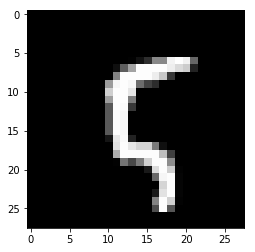

In [7]:
plt.imshow(x_train[100],cmap='gist_gray')

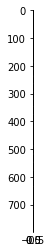

In [8]:
# plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)
plt.imshow(x_train[100].reshape(784,1), cmap='gist_gray')

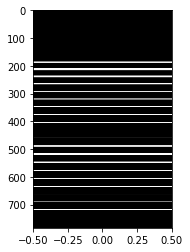

In [9]:
plt.imshow(x_train[100].reshape(784,1), cmap='gist_gray', aspect=0.002)

In [10]:
x_train, x_test = x_train / 255., x_test / 255.

In [11]:
epochs = 10

In [12]:
# Using Keras as Functional API

inputs = tf.keras.Input((28, 28))   # Returns a placeholder tensor

x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(512, activation='relu', name='d1')(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='d2')(x)

In [13]:
model = tf.keras.Model(inputs = inputs, outputs = outputs)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
d1 (Dense)                   (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
d2 (Dense)                   (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
optimizer = tf.keras.optimizers.Adam()

In [16]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, batch_size=32, epochs=epochs)

W0826 08:16:29.838746 139984247195456 deprecation.py:323] From /root/miniconda3/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 318us/sample - loss: 0.2183 - accuracy: 0.9362
Epoch 2/10
60000/60000 [==============================] - 14s 241us/sample - loss: 0.0949 - accuracy: 0.9709
Epoch 3/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0696 - accuracy: 0.9779
Epoch 4/10
60000/60000 [==============================] - 18s 296us/sample - loss: 0.0526 - accuracy: 0.9826
Epoch 5/10
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0424 - accuracy: 0.9861
Epoch 6/10
60000/60000 [==============================] - 14s 230us/sample - loss: 0.0381 - accuracy: 0.9873
Epoch 7/10
60000/60000 [==============================] - 17s 290us/sample - loss: 0.0312 - accuracy: 0.9898
Epoch 8/10
60000/60000 [==============================] - 19s 317us/sample - loss: 0.0267 - accuracy: 0.9913
Epoch 9/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.0266 - accuracy: 0.9

In [18]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 209us/sample - loss: 0.0711 - accuracy: 0.9813


[0.07107269388987916, 0.9813]

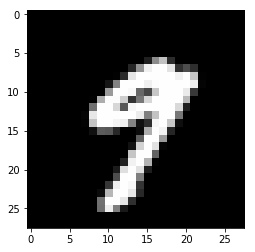

In [23]:
plt.imshow(x_test[20],cmap='gist_gray')

In [24]:
y_test[20]

9